In [1]:
# Install yfinance if not already installed
# !pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Step 1: Load Google Stock Prices
data = yf.download('GOOG', start='2015-01-01', end='2024-01-01')
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2015-01-02  26.045292  26.365890  26.010056  26.253730  28951268
2015-01-05  25.502361  26.021471  25.462164  25.968368  41196796
2015-01-06  24.911291  25.616755  24.866131  25.558441  57998800
2015-01-07  24.868610  25.173524  24.796649  25.161415  41301082
2015-01-08  24.947021  24.986724  24.367366  24.714266  67071641


In [3]:
# Use only 'Close' prices
close_prices = data['Close'].values.reshape(-1, 1)


In [4]:
# Step 2: Normalize the data
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)


In [10]:
# Step 3: Prepare training data
X_train = []
y_train = []

In [11]:
# Using past 60 days' prices to predict the next day's price
for i in range(60, len(scaled_close)):
    X_train.append(scaled_close[i-60:i, 0])
    y_train.append(scaled_close[i, 0])

In [12]:

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [15]:
# Step 4: Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0354
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3210e-04
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.3669e-04
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.7096e-04
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7337e-04
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5863e-04
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0219e-04
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3230e-04
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.7402e-04
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1654e-04
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.1991e-04
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6594e-04
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4379e-04
Epoch 15/20
69/69 ━━━━━━━━━━━━━━━━━━━

In [21]:
# Step 6: Make predictions
predicted_stock_price = model.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_train.reshape(-1,1))

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


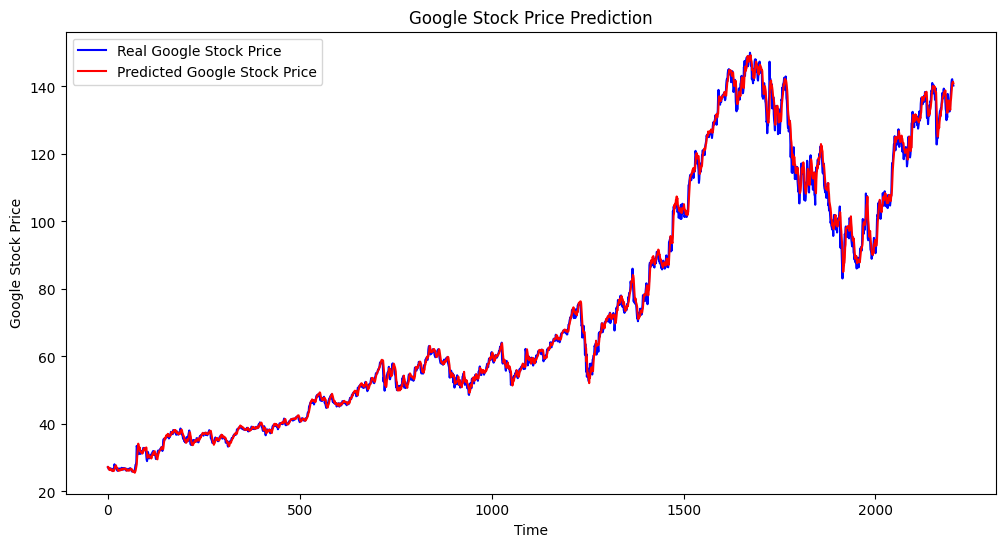

In [22]:
# Step 7: Visualize the results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color='blue', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()